In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 path ='ex1data1.txt'

In [3]:
data = pd.read_csv(path,header=None,names = ['人口','利润'])
data.head()

,人口,利润
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<AxesSubplot:xlabel='人口', ylabel='利润'>

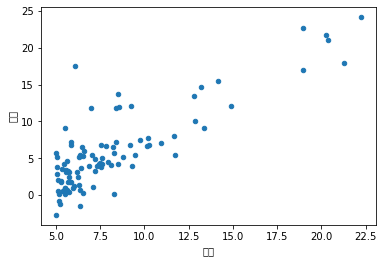

In [5]:
data.plot(kind = 'scatter',x= '人口',y='利润')

In [31]:
def computeJ(X,Y,theta):
    temp = np.power((X*theta.T-Y),2)
    return np.sum(temp)/(2*len(X))

In [8]:
data.insert(0,'辅助',1)

In [9]:
data

,辅助,人口,利润
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [12]:
X = data.iloc[:,0:2] 

In [14]:
Y=data.iloc[:,-1]

In [16]:
X=np.matrix(X)
Y=np.matrix(Y)

In [20]:
X.shape

(97, 2)

In [21]:
Y=Y.T

In [22]:
Y.shape

(97, 1)

In [28]:
theta = np.array([0,0])

In [29]:
theta = np.matrix(theta)

In [32]:
computeJ(X,Y,theta)

32.072733877455676

In [78]:
def grandientDescent(X,Y,theta,alpha,iters):
    temp = theta
    for i in range(iters):
        t0 = np.sum(X*temp.T-Y)/len(X)
        t1 = np.sum(np.multiply((X*temp.T-Y),X[:,1]))/len(X)
        temp = np.matrix([temp[0,0]-alpha*t0,temp[0,1]-alpha*t1])
    return temp

In [79]:
alpha = 0.01
iters = 1000
g = grandientDescent(X,Y,theta,alpha,iters)

In [80]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [81]:
x = np.linspace(data.人口.min(),data.人口.max(),100)

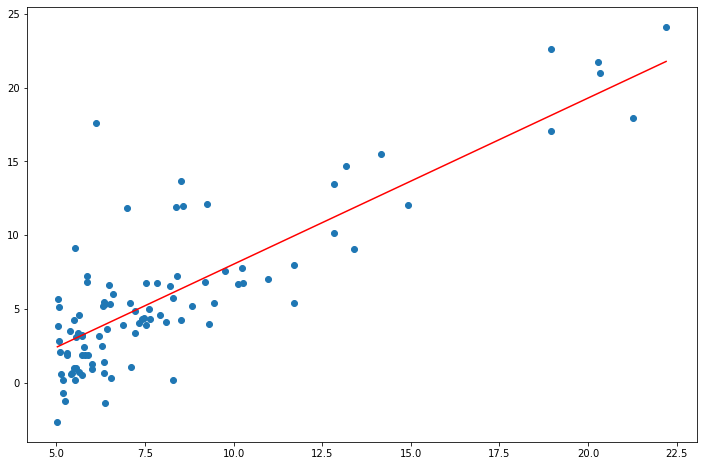

In [82]:
f = g[0,0] + g[0,1]*x
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='预测')
ax.scatter(data.人口,data.利润)
plt.show()